In [8]:
import numpy as np
import matplotlib.pyplot as plt

# SNR and Flip Angles for Hyperpolarized MRI

This notebook aims to demonstrate the tradeoffs of SNR in Hyperpolarized MRI experiments.  
<!-- It covers the following conditions

*  Variable flip angles (ideal)
*  Variable flip angles (actual) - SNR, blurring
*  Readout duration -->



## SNR with ideal variable flip angles

The ideal progression of flip angles to utilize the entire magnetization with $N$ RF pulses is

$$\alpha_n = \arctan (\frac{1}{\sqrt{N-n}})$$

Assuming no T1 decay or conversion between RF pulses, the expected signal from each pulse will be

$$S_n = M_z(0) \frac{1}{\sqrt{N}}$$
Where $M_z(0)$ is the initial z magnetization.

Under these conditions, the total SNR will be the same **regardless of the number of RF pulses(!)**
$$\frac{S}{\sigma} = \frac{\sum_1^N S_n}{\sqrt{N}} = M_z(0) \frac{N/\sqrt{N}}{\sqrt{N}} = M_z(0)$$
Note that the noise scales as the square root of the number of signals summed

In [53]:
def vfa_ideal(num_flips):
    I_flips = np.arange(num_flips)+1
    flip_angles = np.arctan(1/np.sqrt(num_flips-I_flips))
    return flip_angles

def simulate_magnetization(flip_angles):
    num_flips = flip_angles.size
    M0 = 1.
    Mz = np.zeros(num_flips+1)
    Mxy = np.zeros(num_flips+1)
    Mz[0] = M0
    Mxy[0] = 0
    for n in range(0, num_flips):
        Mz[n+1] = Mz[n]*np.cos(flip_angles[n])
        Mxy[n+1] = Mz[n]*np.sin(flip_angles[n])
    return Mxy, Mz


In [54]:
num_flips = 8

flip_angles = vfa_ideal(num_flips)
I_flips = np.arange(flip_angles.size)+1

Mxy, Mz = simulate_magnetization(flip_angles)

cumulative_SNR = np.cumsum(Mxy[1:])/np.sqrt(I_flips)


[(0, 1), Text(0, 0.5, 'Cumulative SNR'), Text(0.5, 0, 'Pulse number')]

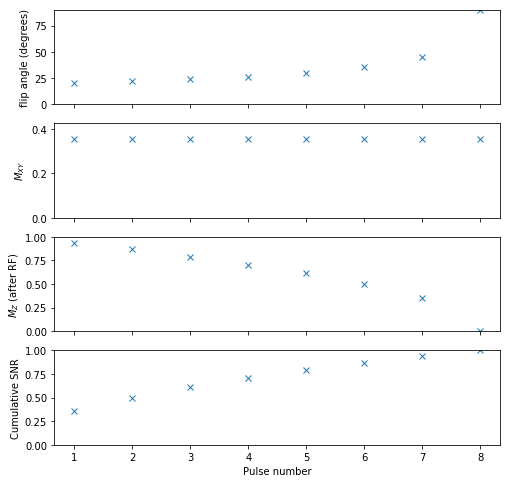

In [55]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex='all', figsize=(8,8))


axs[0].plot(I_flips, flip_angles*180/np.pi, 'x')
axs[0].set(ylabel='flip angle (degrees)',ylim=(0,90))
axs[1].plot(I_flips, Mxy[1:], 'x')
axs[1].set(ylabel='$M_{XY}$',ylim=(0,np.max(Mxy)*1.2))
axs[2].plot(I_flips, Mz[1:], 'x')
axs[2].set(ylabel='$M_{Z}$ (after RF)',ylim=(0,1))
axs[3].plot(I_flips, cumulative_SNR, 'x')
axs[3].set(xlabel='Pulse number', ylabel='Cumulative SNR',ylim=(0,1))


[Text(0.5, 0, '$M_{XY}$')]

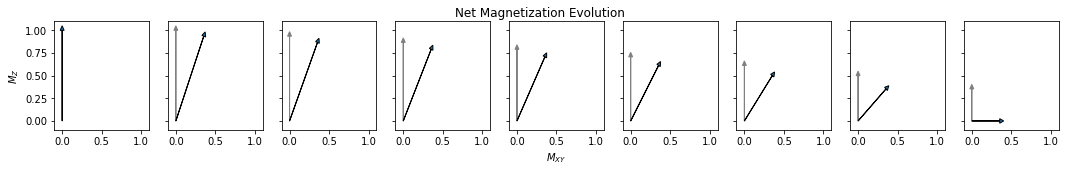

In [78]:
magplot_size = 2
fig, axs = plt.subplots(nrows=1, ncols=num_flips+1, figsize=(magplot_size*(num_flips+1),magplot_size),sharex='all',sharey='all')
for n in range(0, num_flips+1):
    if n > 0:
        axs[n].arrow(0,0,0,Mz[n-1],color='gray',head_width=0.05, head_length=0.05)
    axs[n].arrow(0,0,Mxy[n],Mz[n],head_width=0.05, head_length=0.05)
    axs[n].set(xlim=(-.1,1.1),ylim=(-.1,1.1))
axs[0].set(ylabel='$M_Z$')
fig.suptitle('Net Magnetization Evolution')
axs[round((num_flips+1)/2)].set(xlabel='$M_{XY}$')
